In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/diabetes1.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [ ]:
#spliting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# model building KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 23]
 [18 31]]
0.7337662337662337
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.57      0.63      0.60        49

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.74      0.73      0.74       154



In [ ]:
# find optimal k
error = []
for i in range(1,10):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  error.append(np.mean(y_pred != y_test))


Text(0.5, 0, 'K Value')

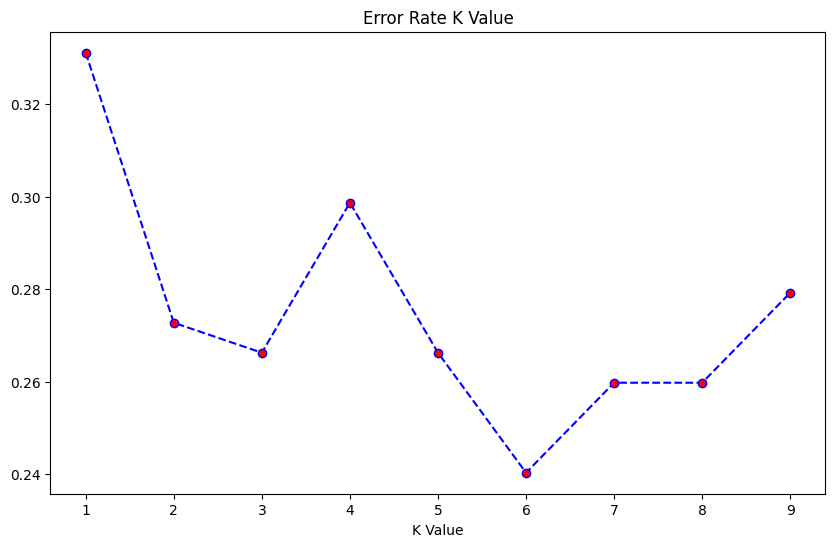

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate K Value')
plt.xlabel('K Value')

In [ ]:
# we find best k=6
new_model = KNeighborsClassifier(n_neighbors=6)
new_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = new_model.predict(x_test)

In [ ]:
# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91 14]
 [23 26]]
0.7597402597402597
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.65      0.53      0.58        49

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.76      0.75       154

